**Source**  
[UCI source](http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption)  
[Data folder](http://archive.ics.uci.edu/ml/machine-learning-databases/00235/)

Georges Hebrail (georges.hebrail '@' edf.fr), Senior Researcher, EDF R&D, Clamart, France
Alice Berard, TELECOM ParisTech Master of Engineering Internship at EDF R&D, Clamart, France

**Data Set Information**  

This archive contains **2075259** measurements gathered in a house located in Sceaux (7 km of Paris, France) between **December 2006** and **November 2010** (**47 months**).  

**Notes:**  
  1. The expression **(1000/60)*GlobalActivePower - S1 - S2 - S3**  
  represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
  2. The dataset contains some missing values in the measurements (nearly **1.25% of the rows**).  
  All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing:  
  a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

**Attribute Information**

  1. **date**: Date in format **dd/mm/yyyy**
  2. **time**: time in format **hh:mm:ss**
  3. **GlobalActivePower**: household global minute-averaged active power (in **kilowatt**)
  4. **GlobalReactivePower**: household global minute-averaged reactive power (in **kilowatt**)
  5. **Voltage**: minute-averaged voltage (in **volt**)
  6. **GlobalIntensity**: household global minute-averaged current intensity (in **ampere**)
  7. **S1**: energy sub-metering No. 1 (in **watt-hour** of active energy).  
  It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
  8.  **S2**: energy sub-metering No. 2 (in **watt-hour** of active energy).  
  It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
  9.  **S3**: energy sub-metering No. 3 (in **watt-hour** of active energy).  
  It corresponds to an electric water-heater and an air-conditioner.
 
**Relevant Papers**

N/A


**Citation Request**

This dataset is made available under the “Creative Commons Attribution 4.0 International (CC BY 4.0)” license
  

### General setup

Submetering 1: $S_1$ $[Wh]$, corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave.  
Submetering 2: $S_2$ $[Wh]$, corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.  
Submetering 3: $S_3$ $[Wh]$, corresponds to an electric water-heater and an air-conditioner.  
Global active power: $P_{active}$ $[kW]$, household global minute-averaged active power.  
  
Active energy consumed: $E_{active}$ $[Wh]$ corresponds to the active energy consumed every minute by electrical equipment not measured in $S_1$, $S_2$ and $S_3$ and is described by:  

$$E_{active} = S_4 = \frac{1000}{60}P_{active} - (S_1 + S_2 + S_3)$$

## Analysis approaches
  * Logger system
  * Summary statistics

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from householddata import load_and_preprocess_data
from householddata import metadata_list
from householddata import daytimeframedata
from householddata import day_of_week_summary
from householddata import months_summary
from householddata import hour_of_day_summary
sns.set_style(style='whitegrid')

metadata = metadata_list()
dayofweek = metadata[4]
months = metadata[5]
hourofday = metadata[6]

In [2]:
powerdata = load_and_preprocess_data()

/home/dreuter/Github/kaggle-paths/household-power/data/power-data.zip
already exists, file not downloaded
txt file already exists in
/home/dreuter/Github/kaggle-paths/household-power/data,
no files extracted


Days processed: 365


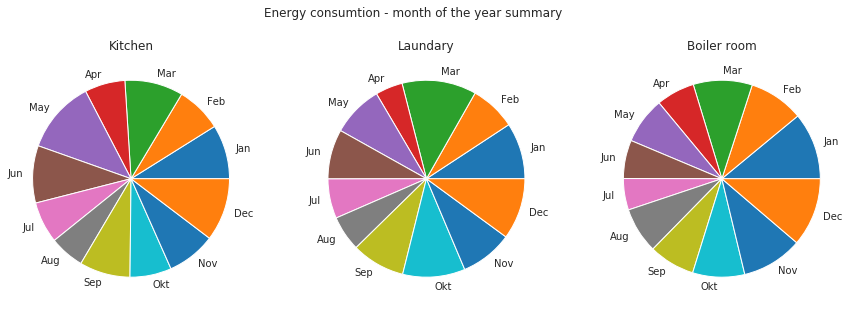

In [12]:
yearsfromstart = 1
roomsummary = months_summary(powerdata,yearsfromstart)

fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Energy consumtion - month of the year summary')
axes[0].pie(x=roomsummary[0], labels=months)
axes[0].set_title('Kitchen')
axes[1].pie(x=roomsummary[1], labels=months)
axes[1].set_title('Laundary')
axes[2].pie(x=roomsummary[2], labels=months)
axes[2].set_title('Boiler room')
plt.show()

Days processed: 364


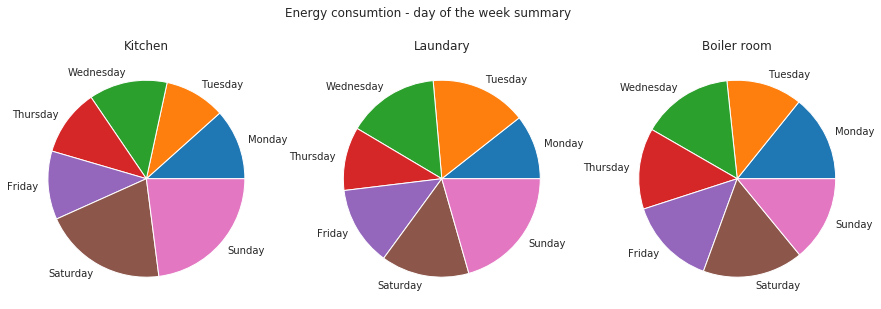

In [11]:
# Day of the week summry
weeksfromstart = 52
roomsummary = day_of_week_summary(powerdata,weeksfromstart)

fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Energy consumtion - day of the week summary')
axes[0].pie(x=roomsummary[0], labels=dayofweek)
axes[0].set_title('Kitchen')
axes[1].pie(x=roomsummary[1], labels=dayofweek)
axes[1].set_title('Laundary')
axes[2].pie(x=roomsummary[2], labels=dayofweek)
axes[2].set_title('Boiler room')
plt.show()

Days processed: 10


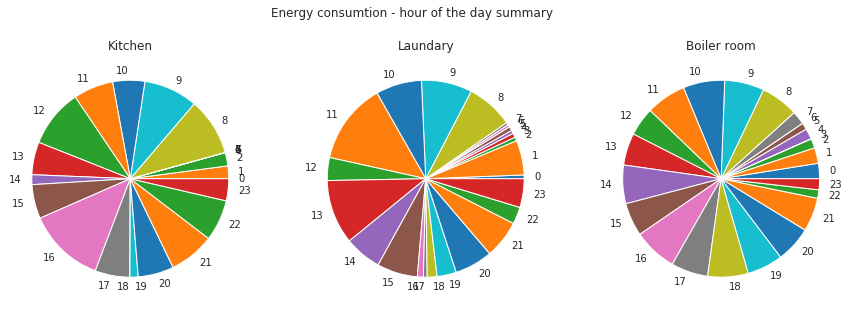

In [13]:
daysfromstart = 10
roomsummary = hour_of_day_summary(powerdata,daysfromstart)
hourofday = [str(x) for x in range(24)]

fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Energy consumtion - hour of the day summary')
axes[0].pie(x=roomsummary[0], labels=hourofday)
axes[0].set_title('Kitchen')
axes[1].pie(x=roomsummary[1], labels=hourofday)
axes[1].set_title('Laundary')
axes[2].pie(x=roomsummary[2], labels=hourofday)
axes[2].set_title('Boiler room')
plt.show()

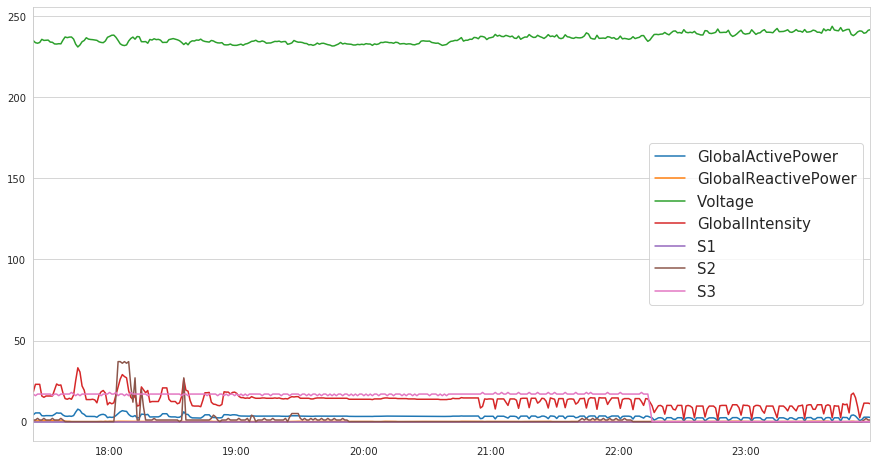

In [5]:
powerdata['2006-12-16'].plot(figsize = (15,8))
plt.legend(fontsize=15)
plt.show()

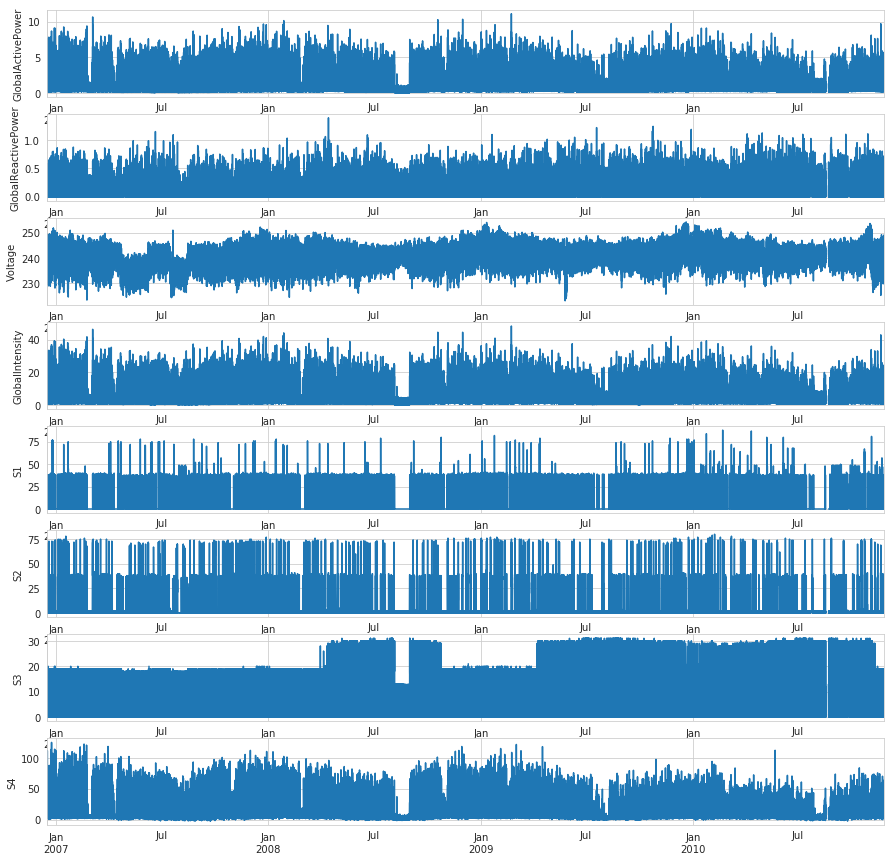

In [5]:
first = 2000
fig, axes = plt.subplots(8,1,figsize=(15,15))
for i in range(8):
    powerdata.iloc[:,i+2].plot(ax=axes[i])
    axes[i].set_ylabel(powerdata.columns[i+2])
plt.show()

In [5]:
powerdata.columns.shape

(9,)

In [6]:
timeframedata, timefrom = daytimeframedata(powerdata,["S1"],0)
timefrom.hour

0

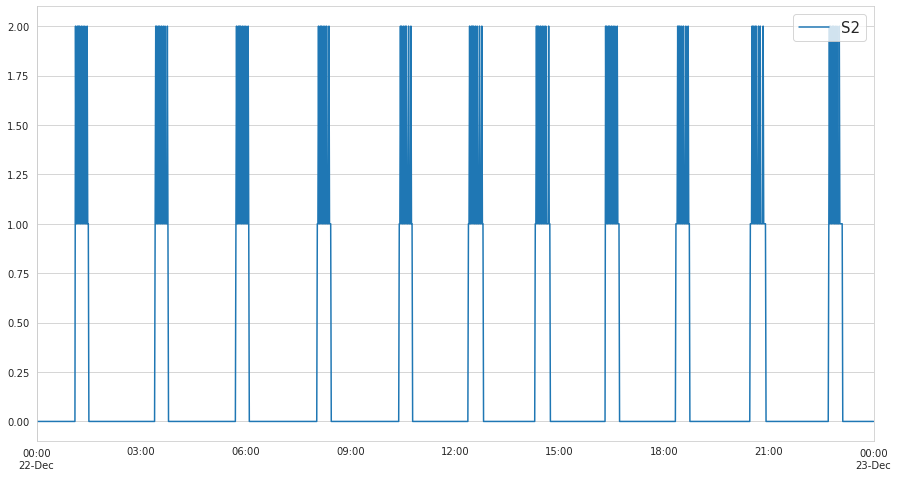

Friday
Total energy consumed in kitchen [kWh]
S2    0.35
dtype: float64


In [11]:
day_of_interest = 5
cols = ["S2"]
timeframedata, timefrom = daytimeframedata(powerdata,cols,day_of_interest)

timeframedata.plot(figsize = (15,8))
plt.legend(fontsize=15)
plt.show()
print(dayofweek[timefrom.dayofweek])
print("Total energy consumed in kitchen [kWh]")
print(np.sum(timeframedata)/1000)

In [14]:
powerdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
Date                   object
Time                   object
GlobalActivePower      float64
GlobalReactivePower    float64
Voltage                float64
GlobalIntensity        float64
S1                     float64
S2                     float64
S3                     float64
dtypes: float64(7), object(2)
memory usage: 158.3+ MB
